<img src="Instacart_logo_small.png" alt="Instacart" style="width: 100px;"/>

# Recommend products to Instacart Customers

## Introduction

> <font color=orange>There's nothing better than online shopping in your PJ's with a glass of wine with the kids asleep!</font> 

<br>Online Shopping is a boon to many people. No more makeup, no more worries about the bad hair day and no more looking for a parking spot -  The entire Retail World is just a click away. Receiving all your groceries at your doorstep on the same day is Fun. **Instacart** is the name who offers this service.
<br><br> So, how does that actually work?
<br><br>Customers place orders online through a Mobile app or using the website to be fulfilled from one of their grocery retail partners. A personal shopper engaged by Instacart picks the items in the store and delivers them in as little as an hour or at the time the customer selects. Sounds really Simple right? But in the back end, lots of algorithms and calculation makes the process happen. 

## Data

For this project, I am using the Dataset from “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 07/10/2019.
<br><br>This anonymized dataset contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, the dataset provides between 4 and 100 of their orders, with the sequence of products purchased in each order. It also provides the week and hour of day the order was placed, and a relative measure of time between the orders.

## Load Data

#### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load Order Details

In [2]:
df_orders = pd.read_csv('instacart_2017_05_01/orders.csv')
df_orders.shape

(3421083, 7)

In [3]:
df_orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

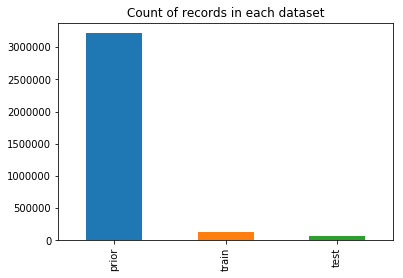

In [4]:
df_orders.eval_set.value_counts().plot("bar", title = "Count of records in each dataset")

In [5]:
df_orders[df_orders.user_id == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [6]:
print("Unique Customers for Prior Set:" , df_orders[df_orders.eval_set == 'prior']["user_id"].nunique())
print("Unique Customers for Train Set:" , df_orders[df_orders.eval_set == 'train']["user_id"].nunique())
print("Unique Customers for Test Set:"  , df_orders[df_orders.eval_set == 'test']["user_id"].nunique())

Unique Customers for Prior Set: 206209
Unique Customers for Train Set: 131209
Unique Customers for Test Set: 75000


The orders.csv has data for 3 evaluation sets: **Prior, Train and Test.** The most of the data belongs to Prior Set and **131209** records for Train Set and **75000** for the Test Set. In this file, there is one record per customer for Training and multiple for Prior orders. Similarly, 1 for Test and multiple for Prior. There is no common users in Train and Test Data.

#### Load Prior Order Details

In [7]:
df_order_prior = pd.read_csv('instacart_2017_05_01/order_products_prior.csv')
df_order_prior.shape

(32434489, 4)

In [8]:
df_order_prior[df_order_prior.order_id == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


#### Load Train Order Details

In [9]:
df_order_train = pd.read_csv('instacart_2017_05_01/order_products_train.csv')
df_order_train.shape

(1384617, 4)

In [10]:
df_order_train[df_order_train.order_id == 1187899]

,order_id,product_id,add_to_cart_order,reordered
484420,1187899,196,1,1
484421,1187899,25133,2,1
484422,1187899,38928,3,1
484423,1187899,26405,4,1
484424,1187899,39657,5,1
484425,1187899,10258,6,1
484426,1187899,13032,7,1
484427,1187899,26088,8,1
484428,1187899,27845,9,0
484429,1187899,49235,10,1


#### Load Products

In [11]:
df_products = pd.read_csv('instacart_2017_05_01/products.csv')
df_products.shape

(49688, 4)

In [12]:
df_products.product_name = df_products.product_name.str.replace(' ','-')

In [13]:
df_products.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate-Sandwich-Cookies,61,19
1,2,All-Seasons-Salt,104,13
2,3,Robust-Golden-Unsweetened-Oolong-Tea,94,7


#### Load Departments

In [14]:
df_departments = pd.read_csv('instacart_2017_05_01/departments.csv')
df_departments.shape

(21, 2)

In [15]:
df_departments.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [16]:
df_departments.department = df_departments.department.str.replace(' ','-')

#### Load Aisles

In [17]:
df_aisles = pd.read_csv('instacart_2017_05_01/aisles.csv')
df_aisles.shape

(134, 2)

In [18]:
df_aisles.aisle = df_aisles.aisle.str.replace(' ','-')

In [19]:
df_aisles.head(3)

,aisle_id,aisle
0,1,prepared-soups-salads
1,2,specialty-cheeses
2,3,energy-granola-bars


So, Now let's check out some important **Numbers**!

In [20]:
print("Total Aisles:          ", df_products.aisle_id.nunique())
print("Total Departments:     ", df_products.department_id.nunique())
print("Unique Products:       ", df_products.product_id.nunique())
print("Total Users/Customers: ", df_orders.user_id.nunique())
print("Total Orders:          ", df_orders.order_id.nunique())

Total Aisles:           134
Total Departments:      21
Unique Products:        49688
Total Users/Customers:  206209
Total Orders:           3421083


## Prepare DataSet

### 1. Combine aisles, departments and products

In [21]:
df_items = pd.merge(left=pd.merge(left=df_products, right=df_departments, how='left'), right=df_aisles, how='left')
df_items.head(3)

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate-Sandwich-Cookies,61,19,snacks,cookies-cakes
1,2,All-Seasons-Salt,104,13,pantry,spices-seasonings
2,3,Robust-Golden-Unsweetened-Oolong-Tea,94,7,beverages,tea


### 2. Create Department Group Column

Let's take a look what are the departments we have here:

In [22]:
df_items.department.unique()

array(['snacks', 'pantry', 'beverages', 'frozen', 'personal-care',
       'dairy-eggs', 'household', 'babies', 'meat-seafood',
       'dry-goods-pasta', 'pets', 'breakfast', 'canned-goods', 'produce',
       'missing', 'international', 'deli', 'alcohol', 'bakery', 'other',
       'bulk'], dtype=object)

#### Create a Function to assign all food items to one common department

In [23]:
def assign_dept(dept_name):
    food = ['dairy-eggs','snacks','produce','breakfast','deli','frozen','meat-seafood','dry-goods-pasta','bakery','canned-goods']
    other = ['missing','other','bulk']
    
    if dept_name in food:
        return("food")
    elif dept_name in other:
        return("other")
    else:
        return(dept_name)

In [24]:
df_items['dept_group'] = df_items.apply(lambda x: assign_dept(x['department']), axis = 1)

Now, we have 10 department groups.

In [25]:
df_items.dept_group.unique()

array(['food', 'pantry', 'beverages', 'personal-care', 'household',
       'babies', 'pets', 'other', 'international', 'alcohol'],
      dtype=object)

In [26]:
df_items = df_items.drop(['department'], axis=1)

In [27]:
df_items.head(3)

,product_id,product_name,aisle_id,department_id,aisle,dept_group
0,1,Chocolate-Sandwich-Cookies,61,19,cookies-cakes,food
1,2,All-Seasons-Salt,104,13,spices-seasonings,pantry
2,3,Robust-Golden-Unsweetened-Oolong-Tea,94,7,tea,beverages


### 3. Combine Prior Orders and Products

In [28]:
df_prior = pd.merge(df_order_prior,df_items, on ='product_id')
df_prior.shape

(32434489, 9)

### 4. Combine Train Orders and Products¶

In [29]:
df_train = pd.merge(df_order_train,df_items, on ='product_id')
df_train.shape

(1384617, 9)

### 5. Combine Prior orders and Order Details

In [30]:
df_prior_orders = pd.merge(df_prior,df_orders[df_orders.eval_set == 'prior'], on ='order_id')
df_prior_orders.shape

(32434489, 15)

### 6. Combine Train Orders and Order Details

In [31]:
df_train_orders = pd.merge(df_train,df_orders[df_orders.eval_set == 'train'], on ='order_id')
df_train_orders.shape

(1384617, 15)

In [32]:
print("Unique Customer Count in Train Dataset: ", df_train_orders['user_id'].nunique())
print("Unique Customer Count in Prior Dataset: ", df_prior_orders['user_id'].nunique())

Unique Customer Count in Train Dataset:  131209
Unique Customer Count in Prior Dataset:  206209


In [33]:
train_users = df_train_orders['user_id'].unique()
prior_users = df_prior_orders['user_id'].unique()
prior_users[np.in1d(prior_users, train_users)]

array([202279, 153404,  58707, ..., 120516, 166751,  22711])

### 7. Merge The Train and Prior Dataset

Nown let's merge the training dataset and the prior order dataset only for those users whose information is there in both the sets. 

In [34]:
df_final = pd.concat([df_prior_orders[df_prior_orders.user_id.isin(train_users)],df_train_orders] ) 
df_final.shape

(22026608, 15)

In [35]:
df_final.eval_set.unique()

array(['prior', 'train'], dtype=object)

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22026608 entries, 0 to 1384616
Data columns (total 15 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
dept_group                object
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(10), object(4)
memory usage: 2.6+ GB


## Feature Extraction

### 1. Size of the Order

How Many Items are added to an Order?

In [37]:
df_final['order_size'] = df_final.groupby('order_id')['order_id'].transform('count')

### 2. Total Orders Count per Customer

How Many times a Customer has placed order?

In [38]:
df_final['total_order_count'] = df_final.groupby(['user_id'])['order_id'].transform('nunique')

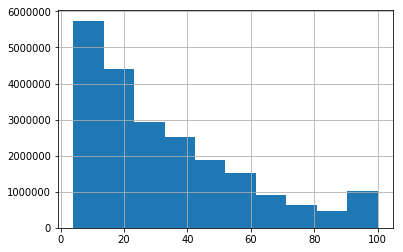

In [39]:
df_final['total_order_count'].hist()

In [40]:
print("Min. Order Count: ", df_final['total_order_count'].min())
print("Max. Order Count: ", df_final['total_order_count'].max())
print("Avg. Order Count: ", df_final['total_order_count'].mean())

Min. Order Count:  4
Max. Order Count:  100
Avg. Order Count:  32.966760156625114


### 3. Loyal Customer

Loyal Customers are those customers who have ordered more than 32 times (The Average Order Counts)

In [41]:
df_final['loyal_customer'] =  np.where(df_final['total_order_count'] > df_final['total_order_count'].mean(), True, False) 

### 4. Order Span

For how long the Customer is doing transactions?

In [42]:
df_order_span = pd.DataFrame(df_final.groupby('user_id')['days_since_prior_order'].sum().reset_index())
df_order_span.columns = ['user_id', 'days_order_span']
df_final = pd.merge(df_final,df_order_span, on ='user_id')

### 5. Customer Department Count

How many times a customer bought a product from a particular department group?

In [43]:
dept = df_final.groupby(['dept_group', 'user_id']).size().reset_index()
dept.columns = ['dept_group','user_id','user_dept_count']
df_final = pd.merge(df_final,dept, on =['dept_group','user_id'])

### 6. Customer Item Count

How many times a customer bought a product?

In [44]:
items = df_final.groupby(['product_name', 'user_id']).size().reset_index()
items.columns = ['product_name','user_id','user_product_count']
df_final = pd.merge(df_final,items, on =['product_name','user_id'])

### 7. Weekend Customer

Does the customer prefer to buy on weekends or a week day?

In [45]:
df_final["weekend_buy"] = np.where(df_final["order_dow"].isin([0,4]),True, False)

### 8. Shopping Hour

Let's check if the customer prefers to shop at morning or evening or at mid night

In [46]:
def assign_preferred_hour(time):
    morning   = [6,7,8,9,10,11]
    afternoon = [12,13,14,15,16,17]
    evening   = [18,19,20,21,22,23]
    midnight  = [0,1,2,3,4,5]
    
    if time in morning:
        return(1)
    elif time in afternoon:
        return(2)
    elif time in evening:
        return(3)
    else:
        return(4)

In [47]:
df_final['preferred_hour'] = df_final.apply(lambda x: assign_preferred_hour(x['order_hour_of_day']), axis = 1)
df_final['preferred_hour'].value_counts()

2    10382774
1     7337127
3     3894602
4      412105
Name: preferred_hour, dtype: int64

In [46]:
#df_final["morning_customer"] = np.where(df_final["order_hour_of_day"].isin([6,7,8,9,10,11]),'yes', 'no')
#df_final["afternoon_customer"] = np.where(df_final["order_hour_of_day"].isin([12,13,14,15,16,17]),'yes', 'no')
#df_final["evening_customer"] = np.where(df_final["order_hour_of_day"].isin([18,19,20,21,22,23]),'yes', 'no')
#df_final["midnight_customer"] = np.where(df_final["order_hour_of_day"].isin([0,1,2,3,4,5]),'yes', 'no')

### 9. Product is Organic?

The products with Organic In the Name are the Organic Products

In [48]:
df_final.product_name = df_final.product_name.str.lower()
df_final["is_organic"] = df_final.product_name.str.contains('organic')
df_final["is_organic"].value_counts()

False    15082541
True      6944067
Name: is_organic, dtype: int64

### 10. Customer Prefers Organic Products?

In [49]:
# Get the count of products ordered Organic
organic_buy  = df_final.groupby("user_id").agg({'is_organic': 'sum'})
# get the Total Order Count
organic_buy["total_order"]  = df_final.groupby("user_id")["total_order_count"].size()

In [50]:
# Calculate Percentegae of Organic Products
organic_buy["percentage"] = round((organic_buy.is_organic/organic_buy.total_order) * 100)
# Customer Prefers Organic Products if 25% or more products are organic
organic_buy["prefers_organic"] = np.where((organic_buy["percentage"] >= 40),1, 0)
organic_buy = organic_buy.reset_index()

In [51]:
organic_buy.head()

,user_id,is_organic,total_order,percentage,prefers_organic
0,1,18.0,70,26.0,0
1,2,56.0,226,25.0,0
2,5,23.0,46,50.0,1
3,7,69.0,215,32.0,0
4,8,30.0,67,45.0,1


In [52]:
organic_buy.prefers_organic.value_counts()

0    92688
1    38521
Name: prefers_organic, dtype: int64

In [53]:
organic_buy = organic_buy.drop(['is_organic',"total_order","percentage"], axis=1)

In [54]:
df_final = pd.merge(df_final,organic_buy , on =['user_id'])

## Data Wrangling

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22026608 entries, 0 to 22026607
Data columns (total 25 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
dept_group                object
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
order_size                int64
total_order_count         int64
loyal_customer            bool
days_order_span           float64
user_dept_count           int64
user_product_count        int64
weekend_buy               bool
preferred_hour            int64
is_organic                bool
prefers_organic           int64
dtypes: bool(3), float64(2), int64(16), object(4)
memory usage: 3.8+ GB


### 1. Check for NAN values

In [56]:
df_final.columns[df_final.isna().any()].tolist()

['days_since_prior_order']

### 2. Convert NAN values to Zero

In [57]:
df_final['days_since_prior_order'] = df_final['days_since_prior_order'].fillna(0).astype(np.int64)

### 3. Sort the Data

In [58]:
df_final = df_final.sort_values(['user_id', 'order_number','add_to_cart_order'])

In [59]:
df_final[df_final.user_id == 1]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,dept_group,user_id,...,order_size,total_order_count,loyal_customer,days_order_span,user_dept_count,user_product_count,weekend_buy,preferred_hour,is_organic,prefers_organic
16844148,2539329,196,1,0,soda,77,7,soft-drinks,beverages,1,...,5,11,False,1248.0,15,11,False,1,False,0
16844134,2539329,14084,2,0,organic-unsweetened-vanilla-almond-milk,91,16,soy-lactosefree,food,1,...,5,11,False,1248.0,51,1,False,1,True,0
16844121,2539329,12427,3,0,original-beef-jerky,23,19,popcorn-jerky,food,1,...,5,11,False,1248.0,51,10,False,1,False,0
16844129,2539329,26088,4,0,aged-white-cheddar-popcorn,23,19,popcorn-jerky,food,1,...,5,11,False,1248.0,51,3,False,1,False,0
16844158,2539329,26405,5,0,xl-pick-a-size-paper-towel-rolls,54,17,paper-goods,household,1,...,5,11,False,1248.0,3,3,False,1,False,0
16844142,2398795,196,1,1,soda,77,7,soft-drinks,beverages,1,...,6,11,False,1248.0,15,11,False,1,False,0
16844096,2398795,10258,2,0,pistachios,117,19,nuts-seeds-dried-fruit,food,1,...,6,11,False,1248.0,51,10,False,1,False,0
16844115,2398795,12427,3,1,original-beef-jerky,23,19,popcorn-jerky,food,1,...,6,11,False,1248.0,51,10,False,1,False,0
16844091,2398795,13176,4,0,bag-of-organic-bananas,24,4,fresh-fruits,food,1,...,6,11,False,1248.0,51,2,False,1,True,0
16844128,2398795,26088,5,1,aged-white-cheddar-popcorn,23,19,popcorn-jerky,food,1,...,6,11,False,1248.0,51,3,False,1,False,0


The Dataset is ready! <br>Now it is time for some Visualisations and find some answers.

### Save the Dataframe for EDA in the next section

In [60]:
df_final.to_csv("data_final.csv")